In [1]:
import warnings
warnings.filterwarnings('ignore')

# Origin-Destination Flow Maps

[Jeff Allen](http://jamaps.github.io)

April, 2023

Intro text

Image

More intro text

## Prerequisites

Prior knowledge of pandas, geopandas, QGIS, and Inkscape (or similar graphic design software) would be helpful for the following tutorial.

Click [here](https://github.com/schoolofcities/mapping-workshops-2023/raw/main/notebooks/od-flow-maps/od-flow-maps.zip) to download this article as a Jupyter Notebook alongside the datasets required. In the download, there is also a standalone Python script, if you want to run the steps all-at-once or integrate with anything else you have brewing.

You can also run the notebook [Binder](https://mybinder.org/v2/gh/schoolofcities/mapping-workshops-2023/HEAD?urlpath=lab%2Ftree%2Fnotebooks%2Fod-flow-maps%2Fod-flow-maps.ipynb)

If you are running the notebook and/or script locally (generally recommended), you will need to use the following libraries. You'll have to install them (e.g. via `pip` or `conda`) if you do not have them installed already.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


## Origin-Destination Matrices

Briefly about them, long and wide formats

In [3]:
od = pd.read_csv("data/od-flows.csv")
od

,dauid,hospital_id,population
0,48060056,0,199.0
1,48060056,1,126.0
2,48060056,2,28.0
3,48060056,3,1.0
4,48060056,4,111.0
...,...,...,...
8370,48062794,0,193.0
8371,48062794,1,406.0
8372,48062794,2,35.0
8373,48062794,3,2.0


When working with data like this, it's sometimes the case that the data come in a 'wide' format, where the rows pertain to the origin (e.g. Dissemination Area) and the columns pertain to the destination (e.g. hospitals).

In pandas, it's super easy to `pivot` from long to wide, or `melt` from wide to long.

In [4]:
od_wide = od.pivot_table(index='dauid', columns='hospital_id', values='population')
od_wide

hospital_id,0,1,2,3,4
dauid,,,,,
48060056,199.0,126.0,28.0,1.0,111.0
48060057,156.0,108.0,22.0,1.0,90.0
48060058,197.0,128.0,28.0,1.0,113.0
48060059,142.0,103.0,21.0,1.0,84.0
48060060,243.0,186.0,36.0,1.0,146.0
...,...,...,...,...,...
48062790,394.0,493.0,71.0,3.0,306.0
48062791,370.0,28.0,108.0,2.0,151.0
48062792,247.0,20.0,94.0,2.0,113.0


In [8]:
od_wide.reset_index().melt(
    id_vars='dauid', 
    value_vars=[0,1,2,3,4], 
    var_name="hospital_id", 
    value_name="population"
)

,dauid,hospital_id,population
0,48060056,0,199.0
1,48060057,0,156.0
2,48060058,0,197.0
3,48060059,0,142.0
4,48060060,0,243.0
...,...,...,...
8370,48062790,4,306.0
8371,48062791,4,151.0
8372,48062792,4,113.0
8373,48062793,4,0.0


In [9]:
da = gpd.read_file("data/da-2021-centroids.geojson")
hp = gpd.read_file("data/hospital-locations.geojson")

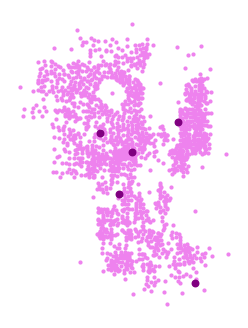

In [32]:
fig, ax = plt.subplots(figsize=(4,4))

da.plot(
    ax = ax,
    color = 'Violet',
    markersize = 4
)

hp.plot(
    ax = ax,
    color = 'Purple',
    markersize = 22
).set_axis_off()